# Disciplina Tópicos Especiais II (C318)

###### Curso: Fundamentos de Machine Learning
###### Alunos: Caio Lima, Tiago Rodrigues, vinícius Marques
###### Professor: Ricardo Augusto

Projeto ML (Machine Learning) - Análise e Modelagem - Dataframe: Video Games Sales as at 20 Dec 2016

##### Objetivo: Classificação de Sucesso de Vendas, categorizar os jogos como bem vendido ou mal vendido a partir da crítica.

##### Regras de Negócio:

- Qual é o comportamento dos dados nas diferentes plataformas?

- Qual a nota que influencia mais na quantidade de vendas, a da crítica ou a do público (para pc)?

- O ano em que o jogo foi lançado influencia na quantidade de vendas de cada região (para pc)?

- O gênero do jogo influencia na nota final dos usuários (para pc)?

##### Tipo de problema: Classificação Binária

##### Enquadramento: Aprendizagem supervisionada, pois a saída é conhecida.

## Instalação das bibliotecas

In [158]:
%pip install pandas
%pip install kagglehub
%pip install numpy
%pip install klib
%pip install matplotlib
%pip install -U scikit-learn
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importação das bibliotecas utilizadas no projeto

In [159]:
import kagglehub
import klib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

## Baixando dataset

In [160]:
# Download latest version
path = kagglehub.dataset_download("rush4ratio/video-game-sales-with-ratings")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Usuario\.cache\kagglehub\datasets\rush4ratio\video-game-sales-with-ratings\versions\2


## Importação da base de dados

In [161]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Informações sobre o dataset:

In [163]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [164]:
df.shape # Quantidade de linhas e colunas do dataset

(16719, 16)

#### Informações advindas do site:

Name:
Name of the game

Platform:
Console on which the game is running

Year_of_Release:
Year of the game released

Genre:
Game's category

Publisher:
Publisher

NA_Sales:
Game sales in North America (in millions of units)

EU_Sales:
Game sales in the European Union (in millions of units)

JP_Sales:
Game sales in Japan (in millions of units)

Other_Sales:
Game sales in the rest of the world, i.e. Africa, Asia excluding Japan, Australia, Europe excluding the E.U. and South America (in millions of units)

Global_Sales:
Total sales in the world (in millions of units)

## Conferindo se há valores duplicados

In [165]:
df.duplicated().sum()

np.int64(0)

## Analizando dos Dados - Manipulando features categóricas

Removendo dados com campos nulos

In [166]:
df = df.dropna()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


Convertendo Strings em valores Numéricos

In [167]:
plataformas = df["Platform"].unique()
genero = df["Genre"].unique()
editora = df["Publisher"].unique()
desenvolvedora = df["Developer"].unique()
classificacao = df["Rating"].unique()

plataformaAdapt = range(0,len(plataformas))
generoAdapt = range(0,len(genero))
editoraAdapt = range(0,len(editora))
desenvolvedoraAdapt = range(0,len(desenvolvedora))
classificacaoAdapt = range(0,len(classificacao))

tabela_plataformas = pd.DataFrame({
    "plataforma antes": plataformas,
    "plataforma depois": plataformaAdapt
})

tabela_genero = pd.DataFrame({
    "genero antes": genero,
    "genero depois": generoAdapt
})

tabela_editora = pd.DataFrame({
    "editora antes": editora,
    "editora depois": editoraAdapt
})

tabela_desenvolvedora = pd.DataFrame({
    "desenvolvedora antes": desenvolvedora,
    "desenvolvedora depois": desenvolvedoraAdapt
})

tabela_classificacao = pd.DataFrame({
    "classificacao antes": classificacao,
    "classificacao depois": classificacaoAdapt
})

# Visualizar os DataFrames criados
display(tabela_plataformas)

display(tabela_genero)

display(tabela_editora)

display(tabela_desenvolvedora)

display(tabela_classificacao)

df["Platform"] = df["Platform"].replace(list(plataformas), plataformaAdapt).astype(int)
df["Genre"] = df["Genre"].replace(list(genero), generoAdapt).astype(int)
df["Publisher"] = df["Publisher"].replace(list(editora), editoraAdapt).astype(int)
df["Developer"] = df["Developer"].replace(list(desenvolvedora), desenvolvedoraAdapt).astype(int)
df["Rating"] = df["Rating"].replace(list(classificacao), classificacaoAdapt).astype(int)


display(df)   


,plataforma antes,plataforma depois
0,Wii,0
1,DS,1
2,X360,2
3,PS3,3
4,PS2,4
5,3DS,5
6,PS4,6
7,PS,7
8,XB,8
9,PC,9


,genero antes,genero depois
0,Sports,0
1,Racing,1
2,Platform,2
3,Misc,3
4,Action,4
5,Puzzle,5
6,Shooter,6
7,Fighting,7
8,Simulation,8
9,Role-Playing,9


,editora antes,editora depois
0,Nintendo,0
1,Microsoft Game Studios,1
2,Take-Two Interactive,2
3,Sony Computer Entertainment,3
4,Activision,4
...,...,...
257,Lighthouse Interactive,257
258,CDV Software Entertainment,258
259,Encore,259
260,Blue Byte,260


,desenvolvedora antes,desenvolvedora depois
0,Nintendo,0
1,Good Science Studio,1
2,Rockstar North,2
3,Polyphony Digital,3
4,"Infinity Ward, Sledgehammer Games",4
...,...,...
1284,"High Moon Studios, Mercenary Technologies",1284
1285,"Infinite Dreams, Paragon 5",1285
1286,Big Red Software,1286
1287,Fluid Studios,1287


,classificacao antes,classificacao depois
0,E,0
1,M,1
2,T,2
3,E10+,3
4,AO,4
5,K-A,5
6,RP,6


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4296\1140387279.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Platform"] = df["Platform"].replace(list(plataformas), plataformaAdapt).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4296\1140387279.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Platform"] = df["Platform"].replace(list(plataformas), plataformaAdapt).astype(int)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4296\1140387279.py:50: FutureWarning: Downcasting behavior in `replace` 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,0,2006.0,0,0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,0,0
2,Mario Kart Wii,0,2008.0,1,0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,0,0
3,Wii Sports Resort,0,2009.0,0,0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,0,0
6,New Super Mario Bros.,1,2006.0,2,0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,0,0
7,Wii Play,0,2006.0,3,0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,13,2001.0,4,261,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,1287,0
16677,Mortal Kombat: Deadly Alliance,13,2002.0,7,29,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,132,1
16696,Metal Gear Solid V: Ground Zeroes,9,2014.0,4,10,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,43,1
16700,Breach,9,2011.0,6,119,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,1288,2


## Avaliando métricas de negócio

Gerando um grafico de disposição para analizar o comportamento dos jogos em diferentes plataformas.

Text(0.5, 0.98, 'Global_Sales general')

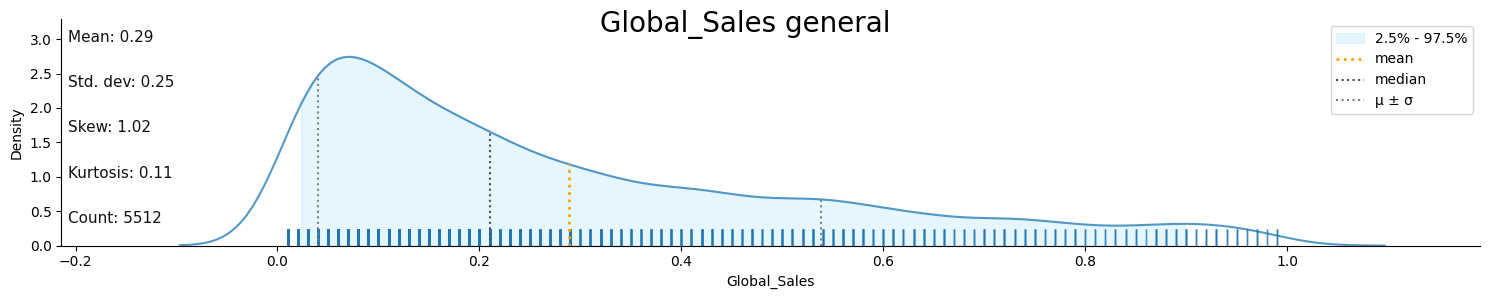

In [168]:
#Analize do dataset como um todo
klib.dist_plot(df['Global_Sales'][df['Global_Sales'] < 1], size = 3)
plt.suptitle("Global_Sales general",size=20)

In [169]:
#Analizando média e mediana para o dataset completo
mediana = df['Global_Sales'].median()
abaixoMediana = df['Global_Sales'][df['Global_Sales']<=mediana].count()
display("mediana: "+ str(mediana))
display("quantidade de jogos abaixo da mediana: " + str(abaixoMediana))
media = df['Global_Sales'].mean()
abaixoMediana = df['Global_Sales'][df['Global_Sales']<=media].count()
display("média: "+ str(media))
display("quantidade de jogos abaixo da média: " + str(abaixoMediana))

'mediana: 0.29'

'quantidade de jogos abaixo da mediana: 3438'

'média: 0.7775897435897436'

'quantidade de jogos abaixo da média: 5156'

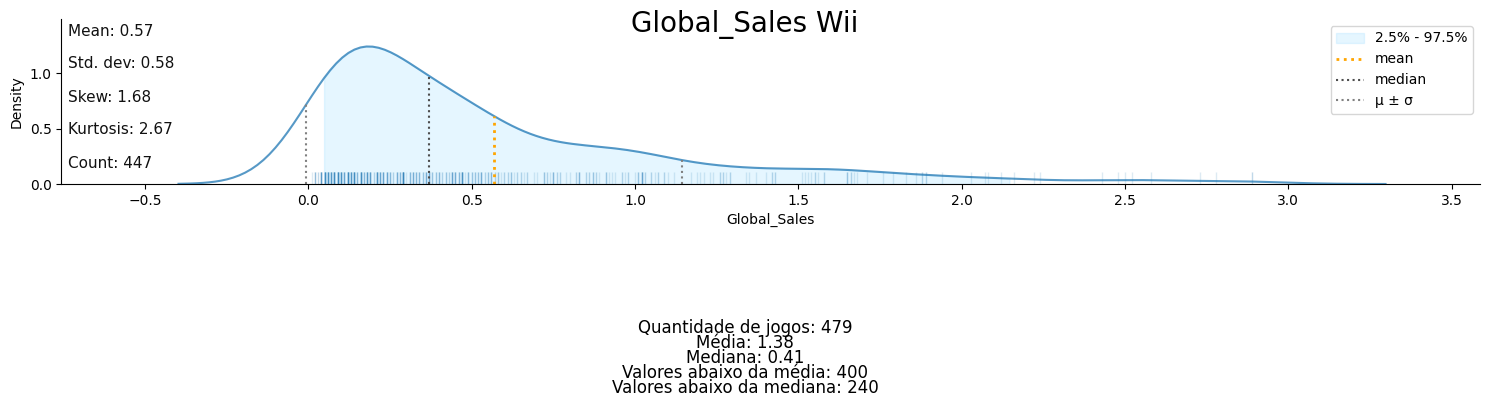

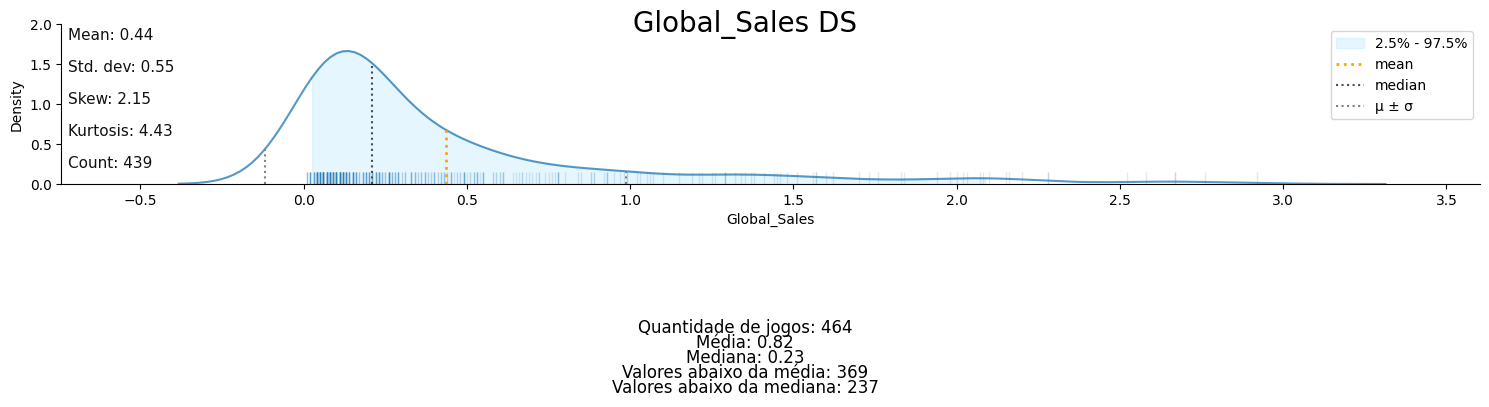

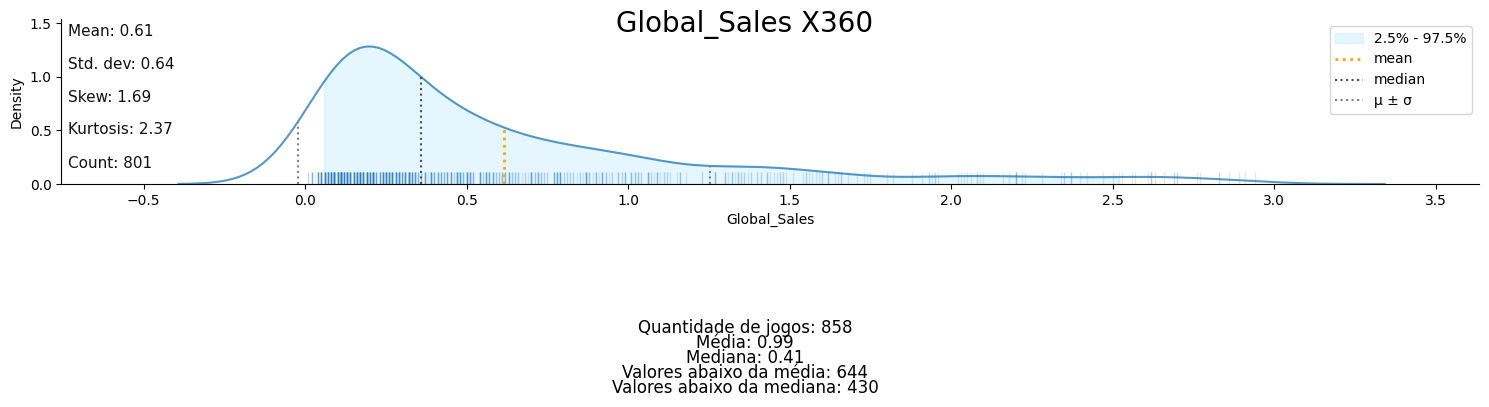

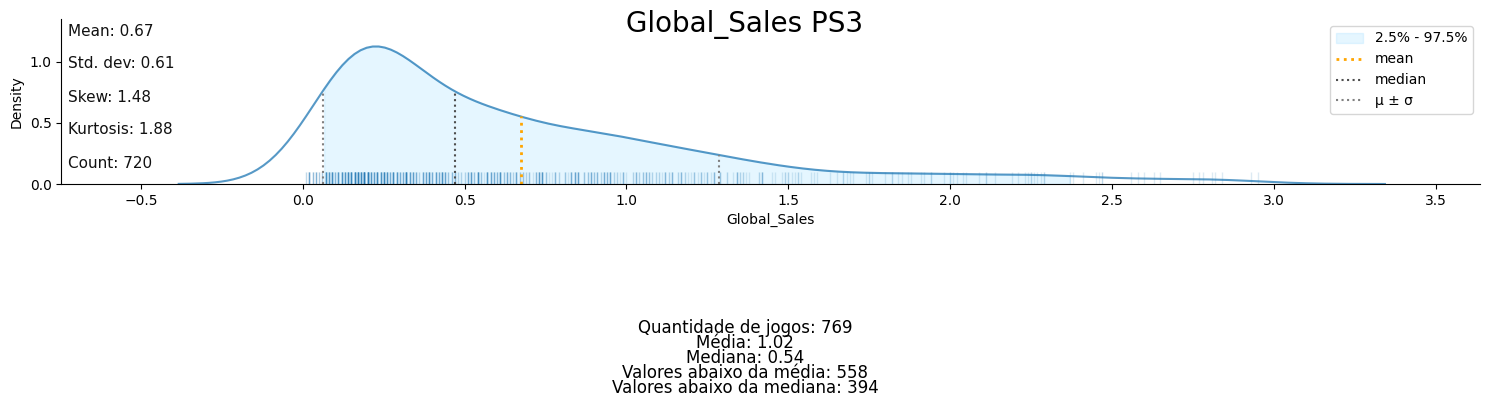

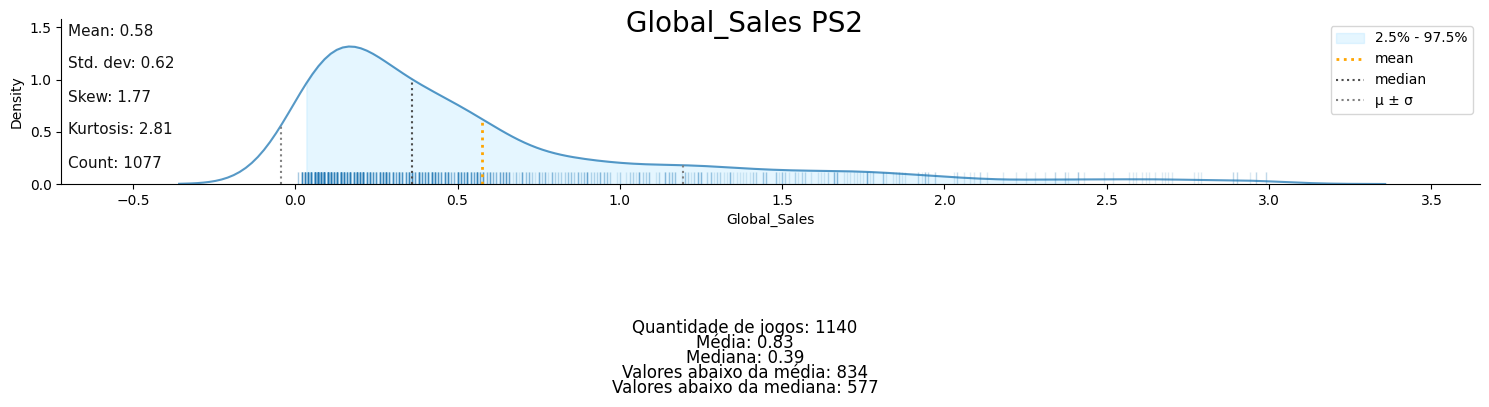

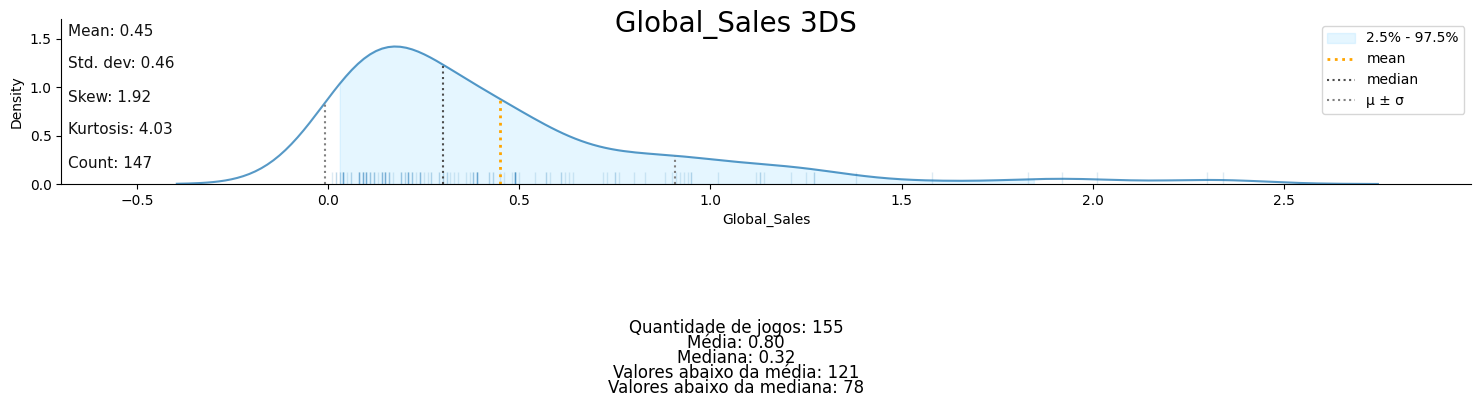

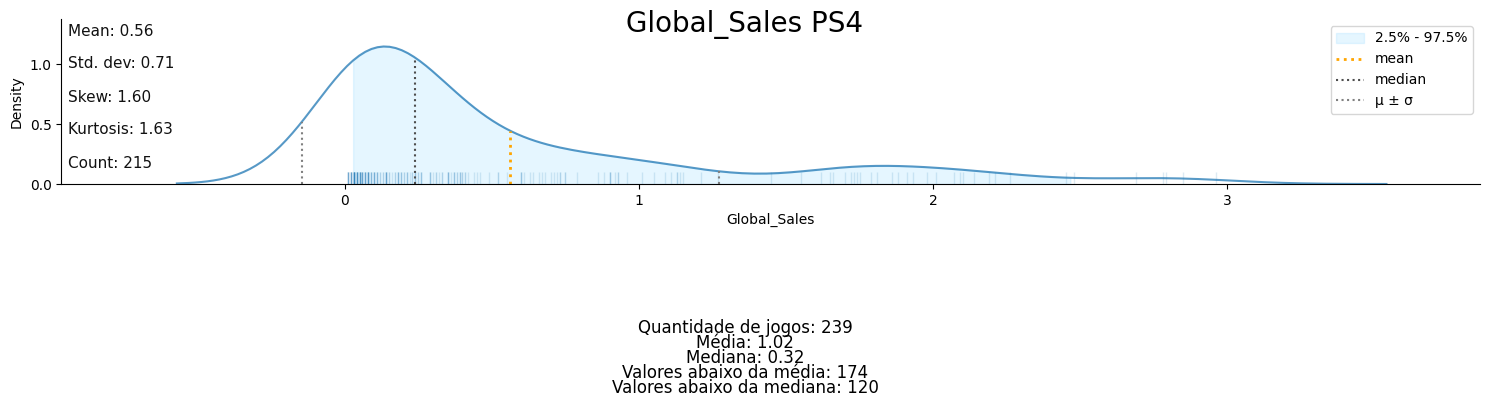

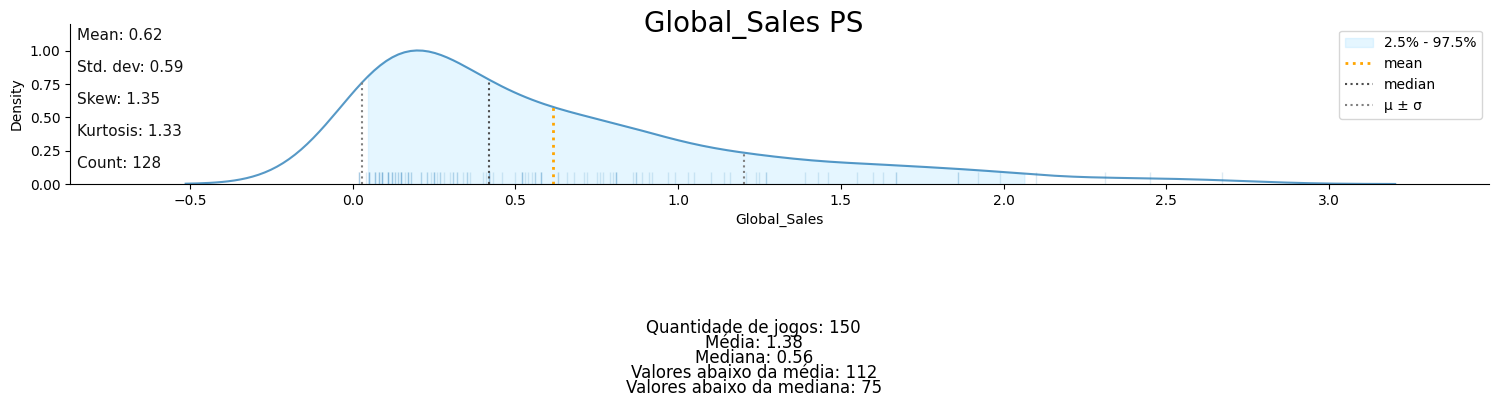

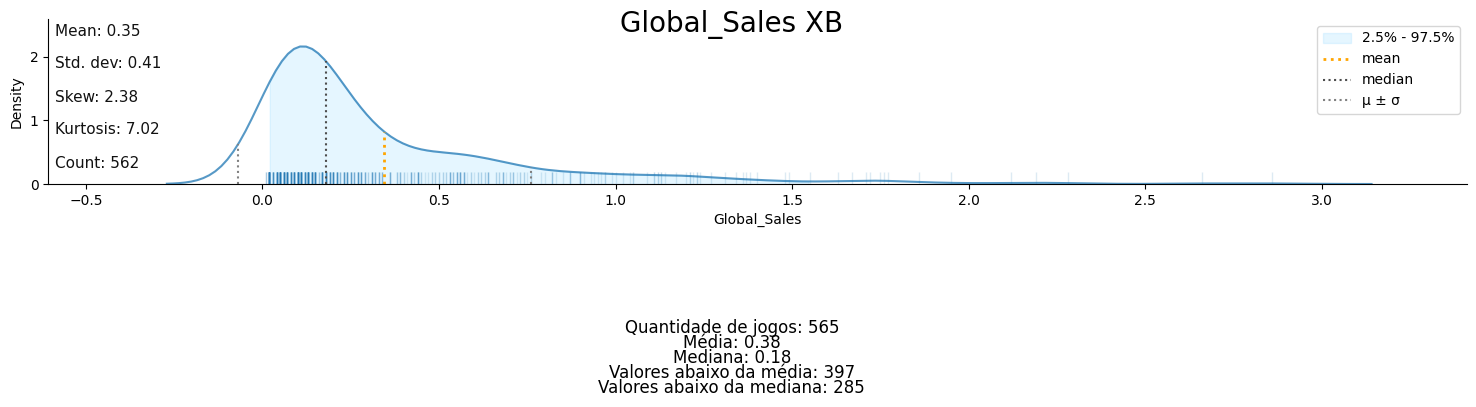

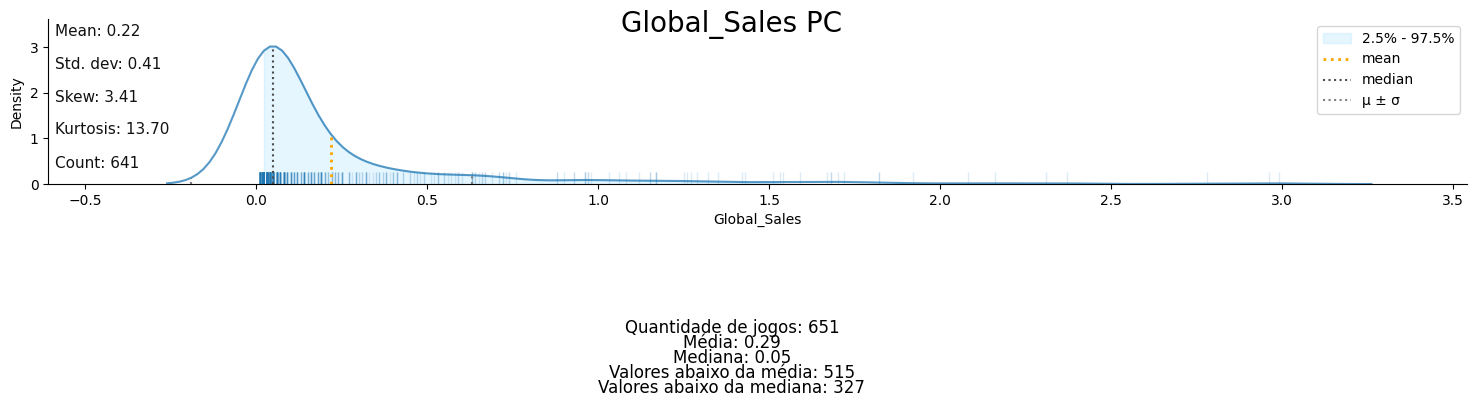

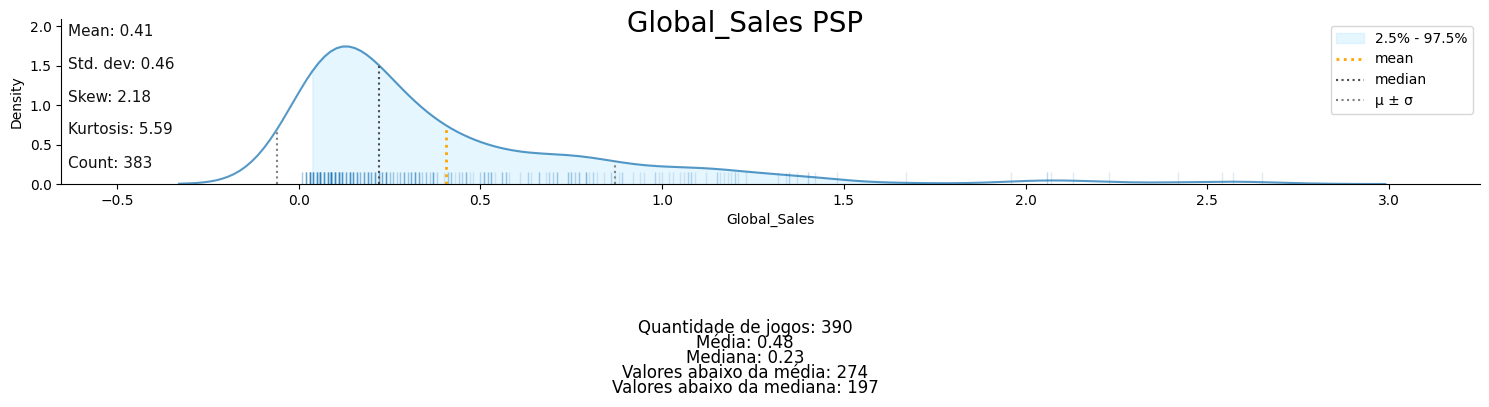

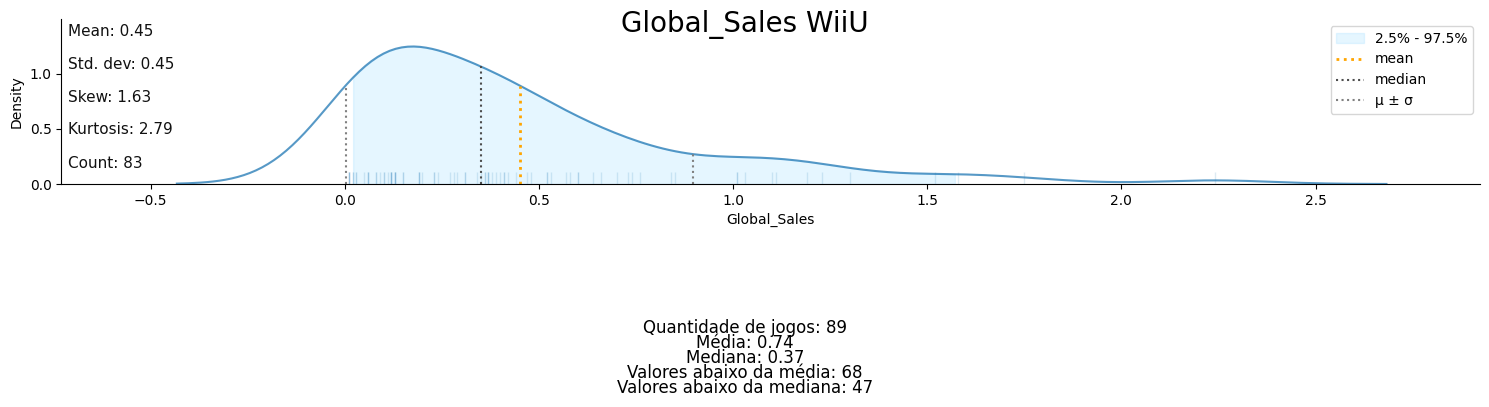

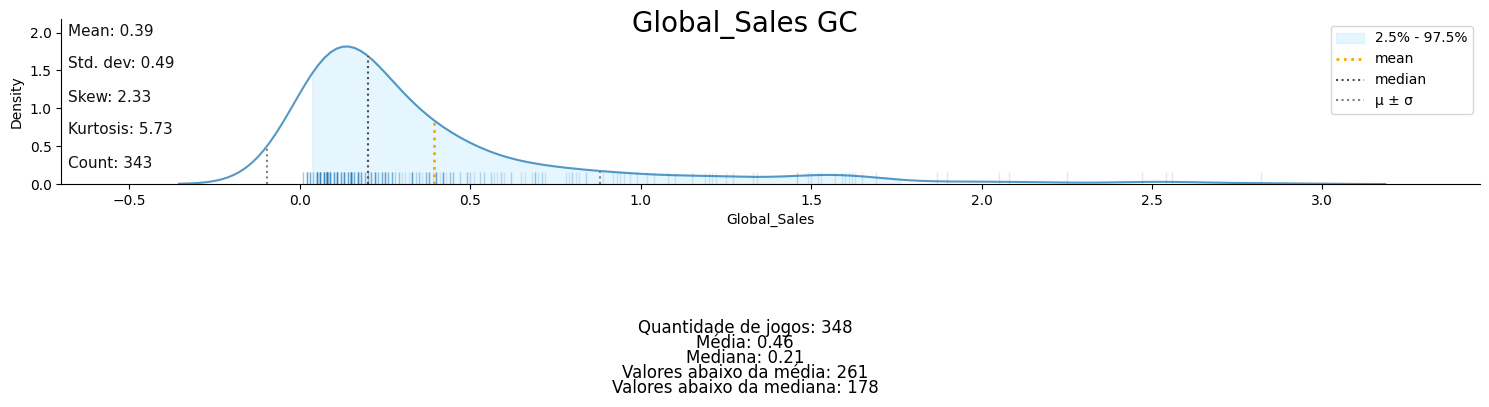

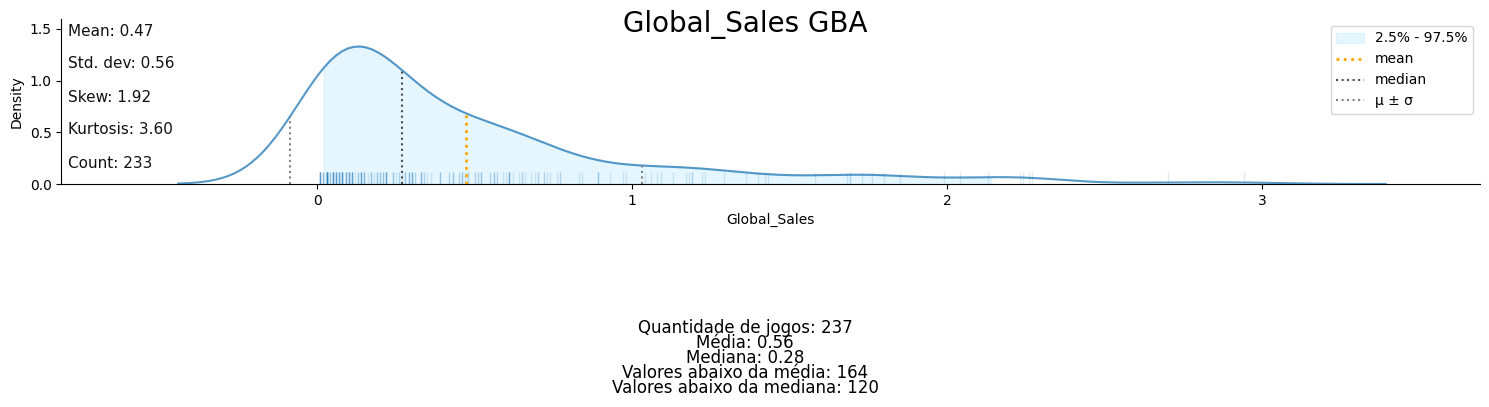

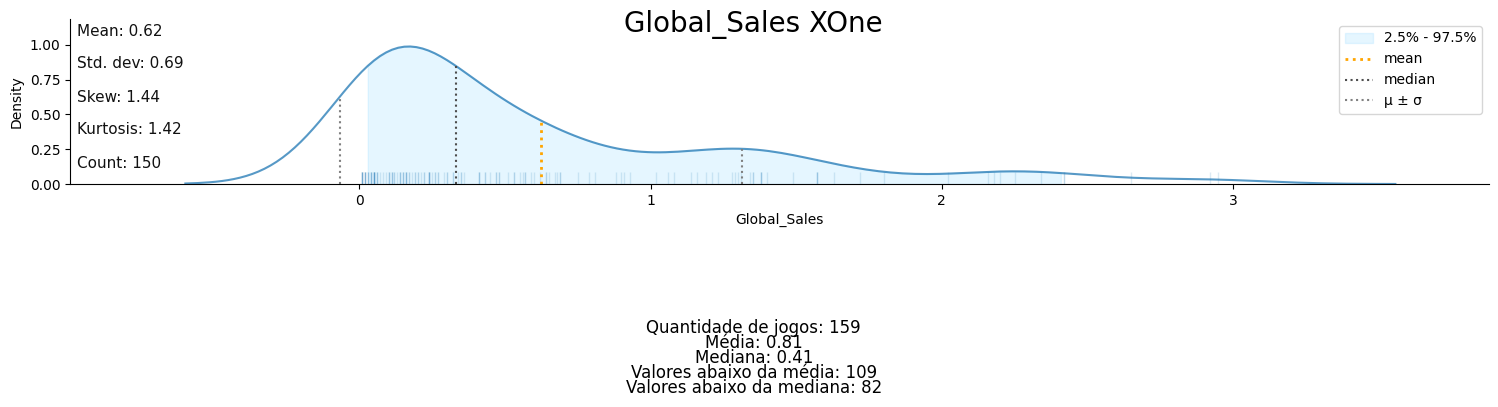

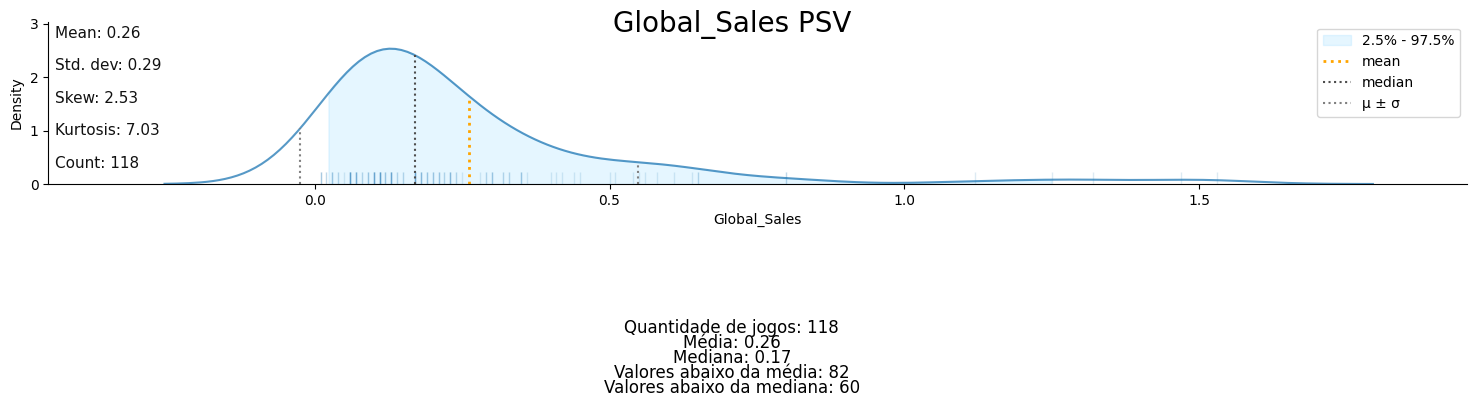

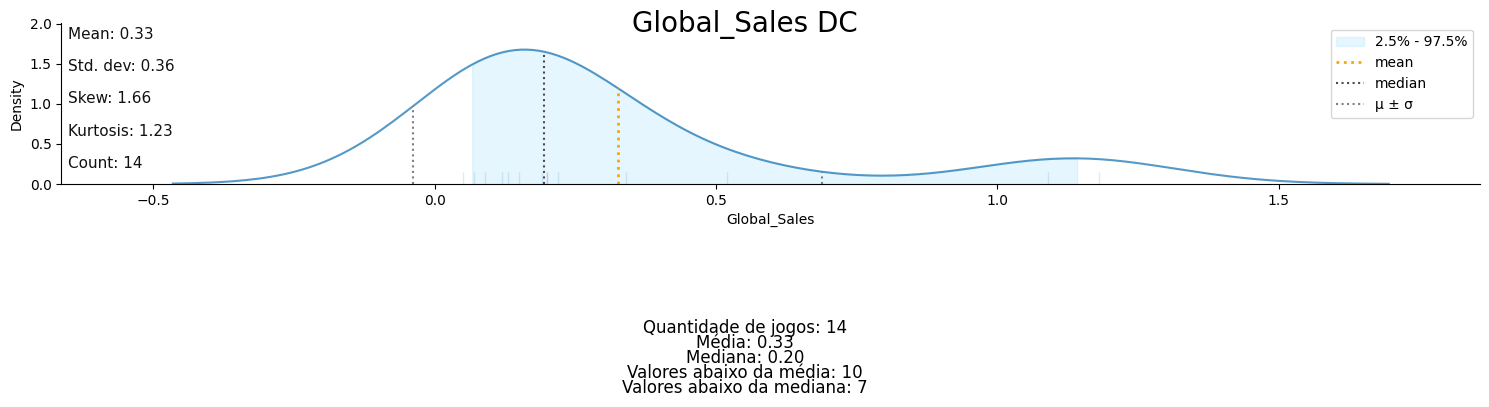

In [170]:
#Graficos por plataforma
for idx, value in enumerate(plataformas):
    porPlataforma = df['Global_Sales'][df['Platform'] == idx]
    klib.dist_plot(porPlataforma[df['Global_Sales'] < 3], size = 3)
    plt.suptitle(f"Global_Sales {value}",size=20)

    media = porPlataforma.mean()
    mediana = porPlataforma.median()
    
    quantidade_jogos = porPlataforma.count()
    abaixo_media = porPlataforma[porPlataforma <= media].count()
    abaixo_mediana = porPlataforma[porPlataforma <= mediana].count()
    
    plt.subplots_adjust(bottom=0.4) 
    
    plt.figtext(0.5, -0.05, f"Quantidade de jogos: {quantidade_jogos}", ha='center', va='top', fontsize=12)
    plt.figtext(0.5, -0.1, f"Média: {media:.2f}", ha='center', va='top', fontsize=12)
    plt.figtext(0.5, -0.15, f"Mediana: {mediana:.2f}", ha='center', va='top', fontsize=12)
    plt.figtext(0.5, -0.2, f"Valores abaixo da média: {abaixo_media}", ha='center', va='top', fontsize=12)
    plt.figtext(0.5, -0.25, f"Valores abaixo da mediana: {abaixo_mediana}", ha='center', va='top', fontsize=12)


Analisando os gráficos acima, é possível notar que a mediada representa um ponto central dos valores, enquanto a média está um pouco acima. Por isso, consideramos valores abaixo da mediana como jogos que não tiveram sucesso, e valores acima da mediana como jogos de sucesso.\
Faremos também uma separação dos dados por plataforma, para deixar o sistema mais específico, e para as demais análises, utilizaremos a plataforma PC para seguir com nossas métricas de negócio.

In [171]:
#Separando datasets por plataforma
dfWii = df[df['Platform'] == 0]
dfDS = df[df['Platform'] == 1]
dfX360 = df[df['Platform'] == 2]
dfPS2 = df[df['Platform'] == 3]
df3DS = df[df['Platform'] == 4]
dfPS4 = df[df['Platform'] == 5]
dfPS = df[df['Platform'] == 6]
dfXB = df[df['Platform'] == 7]
dfPC = df[df['Platform'] == 8]
dfPSP = df[df['Platform'] == 9]
dfWiiU = df[df['Platform'] == 10]
dfGC = df[df['Platform'] == 11]
dfGBA = df[df['Platform'] == 12]
dfXOne = df[df['Platform'] == 13]
dfPSV = df[df['Platform'] == 14]
dfDC = df[df['Platform'] == 15]

dfPC

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
78,Halo 2,8,2004.0,6,1,6.82,1.53,0.05,0.08,8.49,95.0,91.0,8.2,1218.0,18,1
129,Halo: Combat Evolved,8,2001.0,6,1,4.98,1.30,0.08,0.07,6.43,97.0,68.0,8.6,1283.0,18,1
466,Tom Clancy's Splinter Cell,8,2002.0,4,5,1.85,1.04,0.00,0.13,3.02,93.0,46.0,8.5,121.0,50,2
508,The Elder Scrolls III: Morrowind,8,2002.0,9,5,2.09,0.63,0.03,0.11,2.86,87.0,34.0,8.7,111.0,68,2
569,Fable,8,2004.0,9,1,1.99,0.58,0.00,0.09,2.66,85.0,87.0,8.5,268.0,140,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Antz Extreme Racing,8,2002.0,1,52,0.01,0.00,0.00,0.00,0.02,35.0,4.0,8.7,10.0,1258,0
16039,Hummer Badlands,8,2006.0,1,38,0.01,0.00,0.00,0.00,0.02,44.0,7.0,6,5.0,412,0
16196,Grooverider: Slot Car Thunder,8,2003.0,1,259,0.01,0.00,0.00,0.00,0.01,45.0,9.0,7.3,8.0,1270,0
16205,Aeon Flux,8,2005.0,4,26,0.01,0.00,0.00,0.00,0.01,69.0,27.0,3,4.0,217,2


Agora, inseriremos em cada tabela PC, o quão bem o jogo foi, onde:
### 0 = ruim
### 1 = bom


In [172]:
media = dfPC['Global_Sales'].mean()
mediana = dfPC['Global_Sales'].median()
dfPC = dfPC.drop(columns=["Platform"])
conditions = [
    (dfPC['Global_Sales'] < mediana),  
    (dfPC['Global_Sales'] >= mediana)  
]

values = [0, 1]

dfPC['Global_Sales_Category'] = np.select(conditions, values)

dfPC


,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales_Category
78,Halo 2,2004.0,6,1,6.82,1.53,0.05,0.08,8.49,95.0,91.0,8.2,1218.0,18,1,1
129,Halo: Combat Evolved,2001.0,6,1,4.98,1.30,0.08,0.07,6.43,97.0,68.0,8.6,1283.0,18,1,1
466,Tom Clancy's Splinter Cell,2002.0,4,5,1.85,1.04,0.00,0.13,3.02,93.0,46.0,8.5,121.0,50,2,1
508,The Elder Scrolls III: Morrowind,2002.0,9,5,2.09,0.63,0.03,0.11,2.86,87.0,34.0,8.7,111.0,68,2,1
569,Fable,2004.0,9,1,1.99,0.58,0.00,0.09,2.66,85.0,87.0,8.5,268.0,140,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Antz Extreme Racing,2002.0,1,52,0.01,0.00,0.00,0.00,0.02,35.0,4.0,8.7,10.0,1258,0,0
16039,Hummer Badlands,2006.0,1,38,0.01,0.00,0.00,0.00,0.02,44.0,7.0,6,5.0,412,0,0
16196,Grooverider: Slot Car Thunder,2003.0,1,259,0.01,0.00,0.00,0.00,0.01,45.0,9.0,7.3,8.0,1270,0,0
16205,Aeon Flux,2005.0,4,26,0.01,0.00,0.00,0.00,0.01,69.0,27.0,3,4.0,217,2,0


Agora, iremos analisar as quantidades de classes distribuídas de forma igualitária ou não.

Text(0.5, 1.0, 'Distribuição por Categoria')

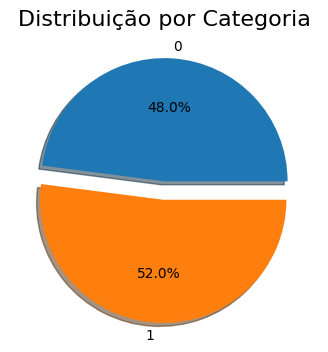

In [173]:
r = dfPC.groupby('Global_Sales_Category')['Global_Sales_Category'].count()

explode = [0.05] * len(r)  
labels = r.index.tolist()  

plt.figure(figsize=(4, 4))  
plt.pie(r, explode=[0.05, 0.1], labels=[0, 1], radius=1, autopct='%1.1f%%',  shadow=True);
plt.title("Distribuição por Categoria", fontsize=16) 

É visível que os dados estão bem equilibrados, logo, é possível fazer um slice simples para o dataset PC para conseguirmos fazer coerentemente as classificações.

Agora, fazer uma análise de comparação entre a avaliação da crítica e dos jogadores para saber qual desses dados tem mais relevância, junto também a influência da categoria na classificação do jogo entre bom e ruim.

In [174]:
dfPC

,Name,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales_Category
78,Halo 2,2004.0,6,1,6.82,1.53,0.05,0.08,8.49,95.0,91.0,8.2,1218.0,18,1,1
129,Halo: Combat Evolved,2001.0,6,1,4.98,1.30,0.08,0.07,6.43,97.0,68.0,8.6,1283.0,18,1,1
466,Tom Clancy's Splinter Cell,2002.0,4,5,1.85,1.04,0.00,0.13,3.02,93.0,46.0,8.5,121.0,50,2,1
508,The Elder Scrolls III: Morrowind,2002.0,9,5,2.09,0.63,0.03,0.11,2.86,87.0,34.0,8.7,111.0,68,2,1
569,Fable,2004.0,9,1,1.99,0.58,0.00,0.09,2.66,85.0,87.0,8.5,268.0,140,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15991,Antz Extreme Racing,2002.0,1,52,0.01,0.00,0.00,0.00,0.02,35.0,4.0,8.7,10.0,1258,0,0
16039,Hummer Badlands,2006.0,1,38,0.01,0.00,0.00,0.00,0.02,44.0,7.0,6,5.0,412,0,0
16196,Grooverider: Slot Car Thunder,2003.0,1,259,0.01,0.00,0.00,0.00,0.01,45.0,9.0,7.3,8.0,1270,0,0
16205,Aeon Flux,2005.0,4,26,0.01,0.00,0.00,0.00,0.01,69.0,27.0,3,4.0,217,2,0


<Axes: >

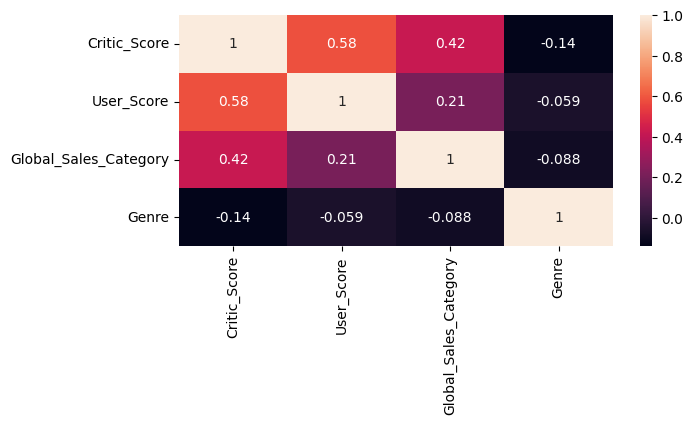

In [175]:
dfPCnoName = dfPC[['Critic_Score', 'User_Score', 'Global_Sales_Category', 'Genre']]
plt.figure(figsize=(7,3))
sns.heatmap(dfPCnoName.corr(), annot=True)

É possível notar que a nota da crítica tem uma influência maior nas vendas do jogo, e que a categoria tem pouca influência no resultado final.

Agora, iremos analisar o quanto o ano influencia no resultado final e nas vendas por região.

<Axes: >

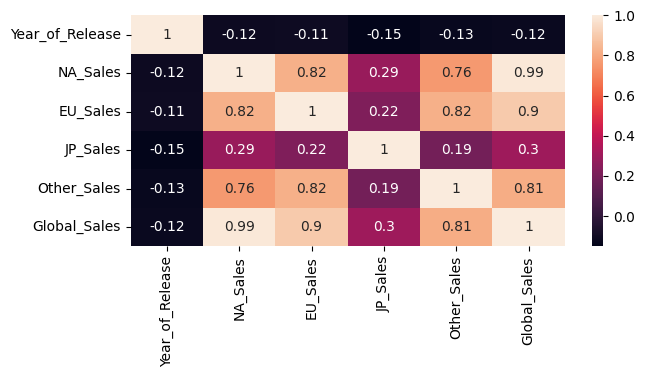

In [176]:
dfPCnoName = dfPC[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
plt.figure(figsize=(7,3))
sns.heatmap(dfPCnoName.corr(), annot=True)

É possível ver que o ano tem pouca influência no resultado das vendas, independente se por região ou pela venda global. Em contraposição, as vendas da região norte americana tem uma grande influência nas vendas globais, seguida pela venda nos Estados Unidos, depois em outras regiões do mundo e por fim do Japão, que tem um influência bem menor.

### Criação do modelo e definição de features

<Axes: >

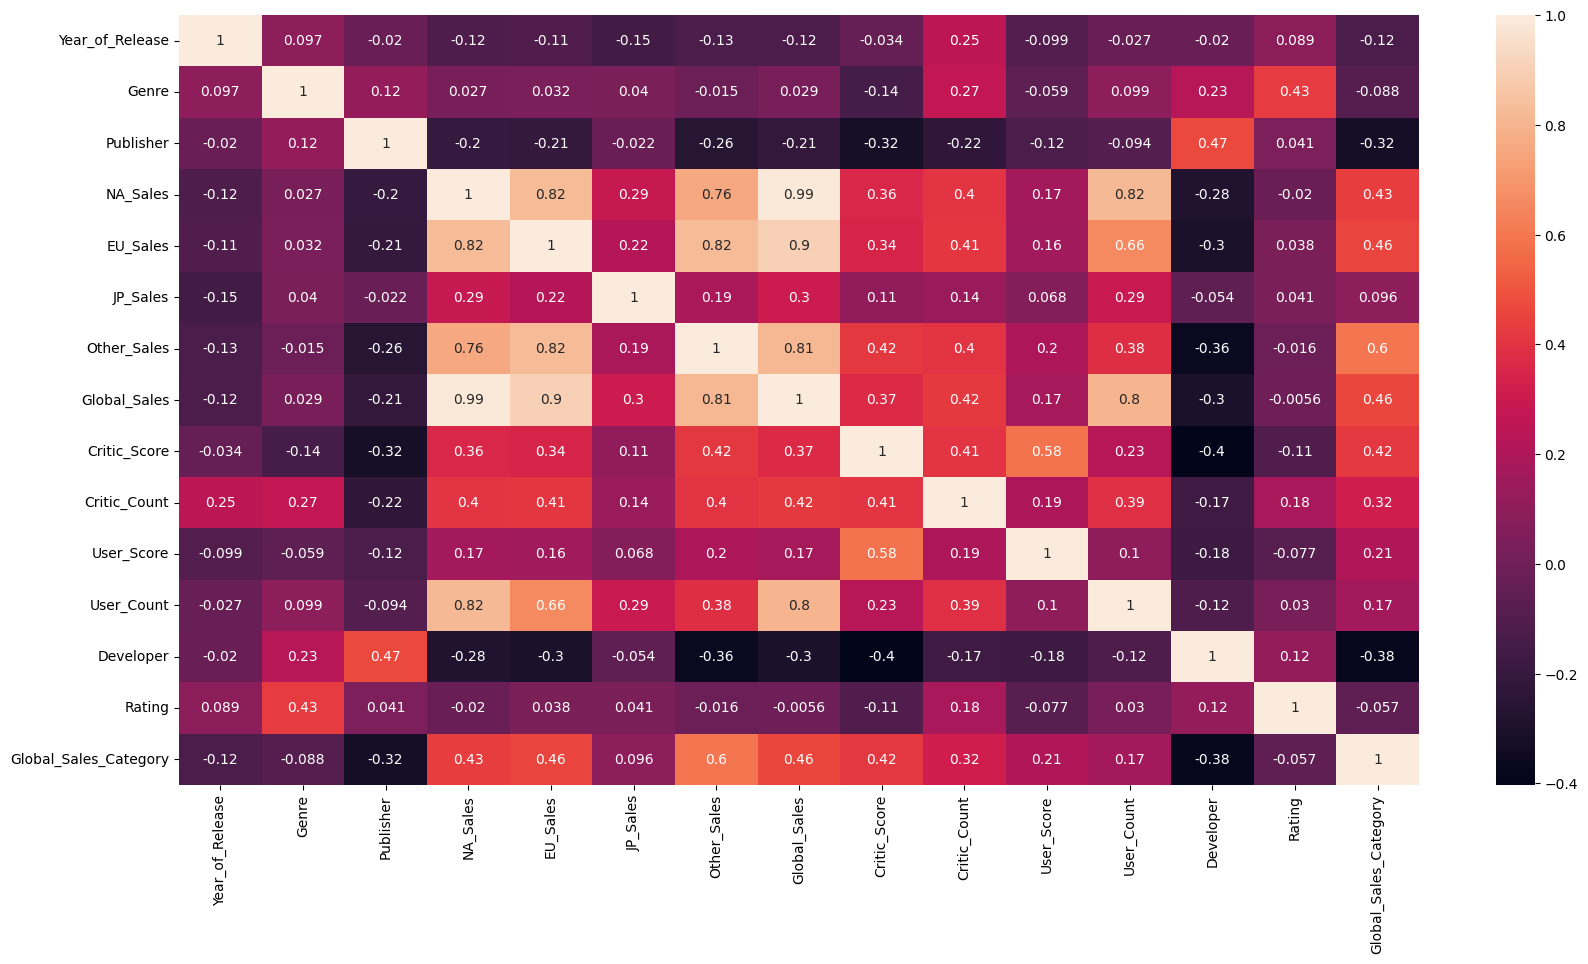

In [177]:
dfPCnoName = dfPC.drop(columns=['Name'])
plt.figure(figsize=(20,10))
sns.heatmap(dfPCnoName.corr(), annot=True)

A partir do heatmap acima, é possível observar que as colunas Developer, Publisher, Genre , Rating e Year of release tem baixa relação com a quantidade total de vendas, portanto, não precisam ser inseridas na classificação.\
É interessante também retirar as coluna de vendas, pois elas não estão no escopo da do nosso objetivo de classificação, além é claro do nome do jogo, pois é um dado do tipo string que pode atrapalhar a classificação.


In [ ]:
dfPCSelected = dfPC.drop(columns=['Developer','Publisher','Genre','Rating','Year_of_Release',
                                   'Global_Sales','Name','NA_Sales','EU_Sales', 'JP_Sales','Other_Sales'])


train, test = train_test_split(dfPCSelected, test_size = 0.2, random_state = 69)
x_train = train.drop(columns='Global_Sales_Category')
y_train = train['Global_Sales_Category']
x_test = test.drop(columns='Global_Sales_Category')
y_test = test['Global_Sales_Category']

display(train)
display(test)

,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales_Category
4838,76.0,15.0,7.5,6.0,1
12710,45.0,33.0,4.6,5.0,0
8083,35.0,20.0,5.9,9.0,1
15501,38.0,9.0,3.6,7.0,0
4401,50.0,14.0,5.9,21.0,1
...,...,...,...,...,...
7958,69.0,14.0,7.5,4.0,1
10570,62.0,24.0,7.9,8.0,0
11650,49.0,18.0,7,4.0,0
6115,58.0,34.0,7.5,20.0,1


,Critic_Score,Critic_Count,User_Score,User_Count,Global_Sales_Category
4464,78.0,22.0,5.2,5.0,1
1652,70.0,28.0,6.9,16.0,1
7341,76.0,20.0,7.5,6.0,1
13444,69.0,32.0,7,4.0,0
9480,33.0,9.0,8,11.0,0
...,...,...,...,...,...
569,85.0,87.0,8.5,268.0,1
11131,74.0,14.0,9.2,14.0,0
4399,88.0,14.0,8.5,11.0,1
4941,84.0,40.0,7.2,35.0,1


Pela análise da distribuição dos dados se assemelhar muito a uma distribuição Gaussiana, optamos pelo classificador GaussianNB, que usa de um algoritmo de byers para fazer o processo de fit, seguido do processo de predict.

In [179]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### Medindo o desempenho de nosso modelo

Agora utilizaremos de algumas métricas para analisar o quão bem foi nosso modelo.

In [180]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
display("True negative:" + str(tn))
display("False Positive:" + str(fp))
display("Flase negative:" + str(fn))
display("True positive:" + str(tp))

'True negative:53'

'False Positive:1'

'Flase negative:32'

'True positive:27'

In [181]:
ER = (fp + fn)/(tp + tn + fp + fn)

display('acurácia:', accuracy_score(y_test, y_pred))
display('Taxa de Erro:', ER)

'acurácia:'

0.7079646017699115

'Taxa de Erro:'

np.float64(0.2920353982300885)

In [182]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.98      0.76        54
           1       0.96      0.46      0.62        59

    accuracy                           0.71       113
   macro avg       0.79      0.72      0.69       113
weighted avg       0.80      0.71      0.69       113



O classificador que utilizamos mostrou um bom desempenho nas diferentes métricas que analisamos, apesar de ter um baixo recall para um jogo bom e uma baixa precisão para um jogo que não foi bem